In [30]:
import pandas as pd

df = pd.read_csv("/content/emails.csv")
df.head()


,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [31]:
df.info()

df.columns = ['text', 'label']
df.dropna(inplace=True)

df['label'] = df['label'].map({'ham': 0, 'spam': 1})


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X = vectorizer.fit_transform(df['text'])
y = df['label']


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
import numpy as np

print(np.any(np.isnan(X_train.toarray())))
print(np.any(np.isinf(X_train.toarray())))


False
False


In [35]:
print(X_train.shape)
print(y_train.shape)

(4582, 36995)
(4582,)


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'])

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import pandas as pd

# Example data
data = {
    'text': [
        'Congratulations! You won a free iPhone!',
        'Meeting rescheduled to tomorrow',
        'Get rich quick now!',
        'Let’s catch up next week',
    ],
    'label': ['spam', 'ham', 'spam', 'ham']
}

df = pd.DataFrame(data)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [38]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.0

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [39]:
def predict_spam(email_text):
    email_vector = vectorizer.transform([email_text])
    prediction = model.predict(email_vector)[0]
    return "Spam" if prediction == 1 else "Not Spam"

predict_spam("Congratulations! You've won a $1000 Walmart gift card!")


'Spam'

In [40]:
import pickle

# Save model and vectorizer
with open('spam_model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)


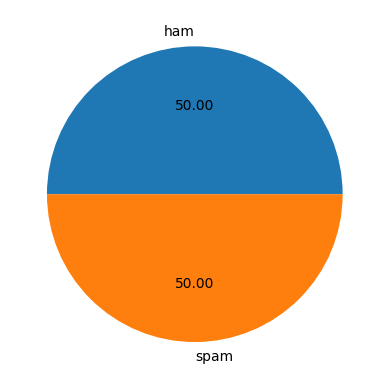

In [41]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['ham','spam'],autopct="%0.2f") # Changed 'target' to 'label'
plt.show()

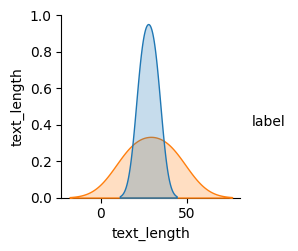

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'label' is the column you want to use for hue
sns.pairplot(df, hue='label')
plt.show()

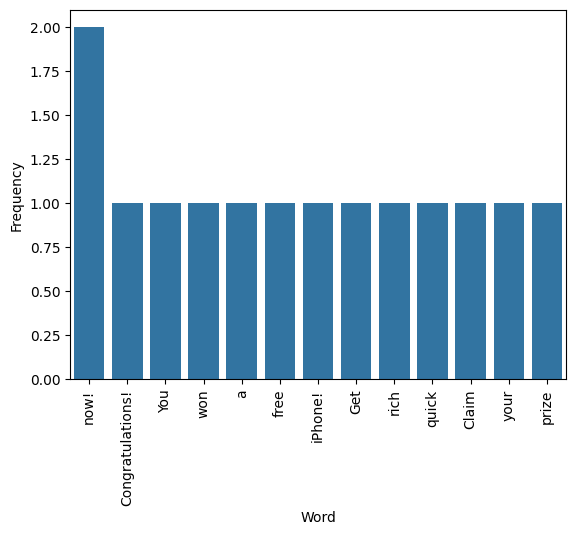

In [44]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume spam_emails is a list containing spam email texts
spam_emails = [
    "Congratulations! You won a free iPhone!",
    "Get rich quick now!",
    "Claim your prize now!",
    # ... add more spam emails here ...
]

# Create a list of words from the spam emails
spam_corpus = [word for email in spam_emails for word in email.split()]

# Create a DataFrame from the most common words
spam_corpus_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])

# Create the bar plot using the DataFrame and keyword arguments
sns.barplot(x='Word', y='Frequency', data=spam_corpus_df)  # Use keyword arguments

plt.xticks(rotation='vertical')
plt.show()

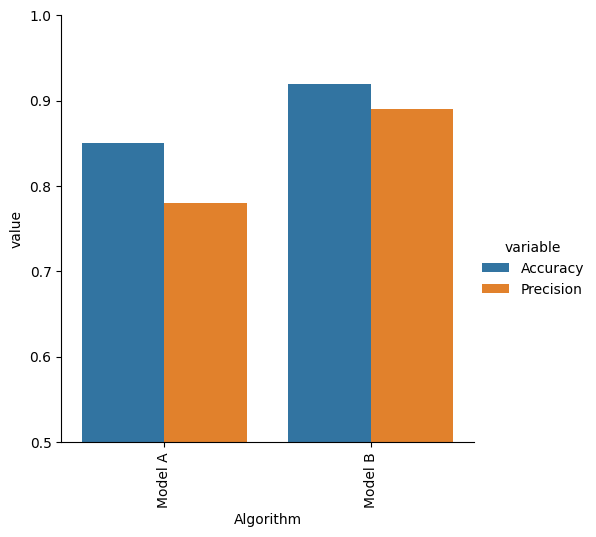

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# **Create example data for performance_df1 (replace with your actual data)**
data = {'Algorithm': ['Model A', 'Model B', 'Model A', 'Model B'],
        'variable': ['Accuracy', 'Accuracy', 'Precision', 'Precision'],
        'value': [0.85, 0.92, 0.78, 0.89]}
performance_df1 = pd.DataFrame(data)

# **Now you can proceed with the plotting**
sns.catplot(x='Algorithm', y='value',
            hue='variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()